In [1]:
%matplotlib inline
from datetime import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [16,10]
print("All Good!!!")

All Good!!!


In [4]:
#load data
print("data loading.....")
train = pd.read_csv("small_data_set/train1.csv", index_col=0)
test = pd.read_csv("small_data_set/test1.csv", index_col=0)
print("data loaded")

data loading.....
data loaded


In [5]:
# # train_new = train.loc[:50000-1,:]
# # test_new = test.loc[:10000-1,:]
# train_new.to_csv('train1.csv')
# test_new.to_csv('test1.csv')

In [7]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


In [8]:
# longitude and lattitude are 6 decimal values
# wrap these upto 3
pd.set_option('display.float_format', lambda x: '%.3f' %x)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [9]:
train['vendor_id'].unique()

array([2, 1], dtype=int64)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
id                    50000 non-null object
vendor_id             50000 non-null int64
pickup_datetime       50000 non-null object
dropoff_datetime      50000 non-null object
passenger_count       50000 non-null int64
pickup_longitude      50000 non-null float64
pickup_latitude       50000 non-null float64
dropoff_longitude     50000 non-null float64
dropoff_latitude      50000 non-null float64
store_and_fwd_flag    50000 non-null object
trip_duration         50000 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 4.6+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null object
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 781.2+ KB


In [13]:
# remove outlier looking into trip duration
mean = np.mean(train['trip_duration'])
std = np.std(train['trip_duration'])

# look how to remove and save them int he same column
train = train[train['trip_duration'] >= mean-2*std]
train.info()
train = train[train['trip_duration'] <= mean+2*std]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
id                    50000 non-null object
vendor_id             50000 non-null int64
pickup_datetime       50000 non-null object
dropoff_datetime      50000 non-null object
passenger_count       50000 non-null int64
pickup_longitude      50000 non-null float64
pickup_latitude       50000 non-null float64
dropoff_longitude     50000 non-null float64
dropoff_latitude      50000 non-null float64
store_and_fwd_flag    50000 non-null object
trip_duration         50000 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49923 entries, 0 to 49999
Data columns (total 11 columns):
id                    49923 non-null object
vendor_id             49923 non-null int64
pickup_datetime       49923 non-null object
dropoff_datetime      49923 non-null object
passenger_count       49923 non-null int64
pickup_longitude 

In [14]:
# # reset?
# reset_selective train
# train.info()

In [15]:
# city_long_border = (-74.03, -73.75)
# city_lat_border = (40.63, 40.85) 
train = train[(train['pickup_longitude'] <= -73.75) & (train['pickup_longitude'] >= -74.03)]
train = train[(train['pickup_latitude'] <= 40.85) & (train['pickup_latitude'] >= 40.63)]
train = train[(train['dropoff_longitude'] <= -73.75) & (train['dropoff_longitude'] >= -74.03)]
train = train[(train['dropoff_latitude'] <= 40.85) & (train['dropoff_latitude'] >= 40.63)]

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 11 columns):
id                    49267 non-null object
vendor_id             49267 non-null int64
pickup_datetime       49267 non-null object
dropoff_datetime      49267 non-null object
passenger_count       49267 non-null int64
pickup_longitude      49267 non-null float64
pickup_latitude       49267 non-null float64
dropoff_longitude     49267 non-null float64
dropoff_latitude      49267 non-null float64
store_and_fwd_flag    49267 non-null object
trip_duration         49267 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 4.5+ MB


In [17]:
train['pickup_datetime'].loc[:10]

0     2016-03-14 17:24:55
1     2016-06-12 00:43:35
2     2016-01-19 11:35:24
3     2016-04-06 19:32:31
4     2016-03-26 13:30:55
5     2016-01-30 22:01:40
6     2016-06-17 22:34:59
7     2016-05-21 07:54:58
8     2016-05-27 23:12:23
9     2016-03-10 21:45:01
10    2016-05-10 22:08:41
Name: pickup_datetime, dtype: object

In [18]:
# change the data type pf date time column from object or 
# string --> datetime
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
# not in test, because this is the task to predict trip time

In [19]:
train['pickup_datetime'].loc[:10]

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
5    2016-01-30 22:01:40
6    2016-06-17 22:34:59
7    2016-05-21 07:54:58
8    2016-05-27 23:12:23
9    2016-03-10 21:45:01
10   2016-05-10 22:08:41
Name: pickup_datetime, dtype: datetime64[ns]

In [20]:
train.loc[:,'pickup_date'] = train['pickup_datetime'].dt.date
test.loc[:,'pickup_date'] = test['pickup_datetime'].dt.date


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 12 columns):
id                    49267 non-null object
vendor_id             49267 non-null int64
pickup_datetime       49267 non-null datetime64[ns]
dropoff_datetime      49267 non-null datetime64[ns]
passenger_count       49267 non-null int64
pickup_longitude      49267 non-null float64
pickup_latitude       49267 non-null float64
dropoff_longitude     49267 non-null float64
dropoff_latitude      49267 non-null float64
store_and_fwd_flag    49267 non-null object
trip_duration         49267 non-null int64
pickup_date           49267 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 6.1+ MB


In [22]:
#train['pickup_time'][:10]

In [23]:
# don't work this way
#reset_selective train['pickup_time']

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null datetime64[ns]
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
pickup_date           10000 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 859.4+ KB


In [25]:
# remove pickup_time from both train and test
# train = train.drop(['pickup_time'], axis=1)
# test = test.drop(['pickup_time'], axis=1)

In [26]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,1.528,1.638,-73.973,40.751,-73.973,40.752
std,0.499,1.308,0.039,0.028,0.039,0.033
min,1.000,1.000,-74.178,40.604,-74.326,40.526
25%,1.000,1.000,-73.992,40.739,-73.991,40.738
50%,2.000,1.000,-73.981,40.755,-73.979,40.755
75%,2.000,2.000,-73.968,40.768,-73.963,40.769
max,2.000,6.000,-73.484,41.106,-73.484,41.106


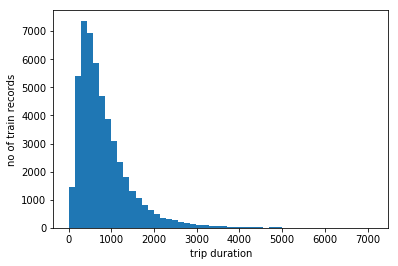

In [27]:
# data visulaization
plt.hist(train['trip_duration'].values, bins=50)
plt.xlabel('trip duration')
plt.ylabel('no of train records')
plt.show()

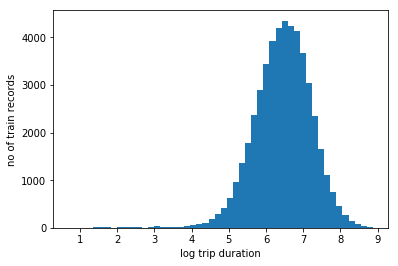

In [28]:
# it seemed like skewed disptribution
# which means it shifted towards one sided

# lets see what happens with log of data
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins = 50)
plt.xlabel('log trip duration')
plt.ylabel('no of train records')
plt.show()

C:\Users\ankish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


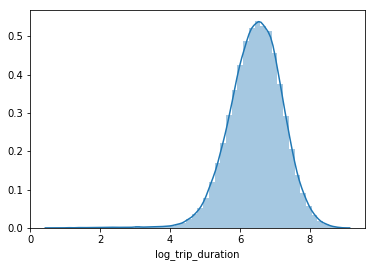

In [29]:
# lets use seaborn
sns.distplot(train['log_trip_duration'], bins=50)

In [30]:
# let's analyse trip duration with the date
# train.groupby('pickup_date').count()[['id']]

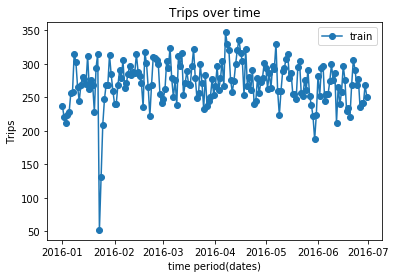

In [31]:
plt.plot(train.groupby('pickup_date').count()[['id']],
        'o-', label='train')
# plt.plot(test.groupby('pickup_date').count()[['id']],
#         'o-', label='test')
plt.title('Trips over time')
plt.legend(loc=0)
plt.xlabel('time period(dates)')
plt.ylabel('Trips')
plt.show()

Text(0,0.5,'Time in second')

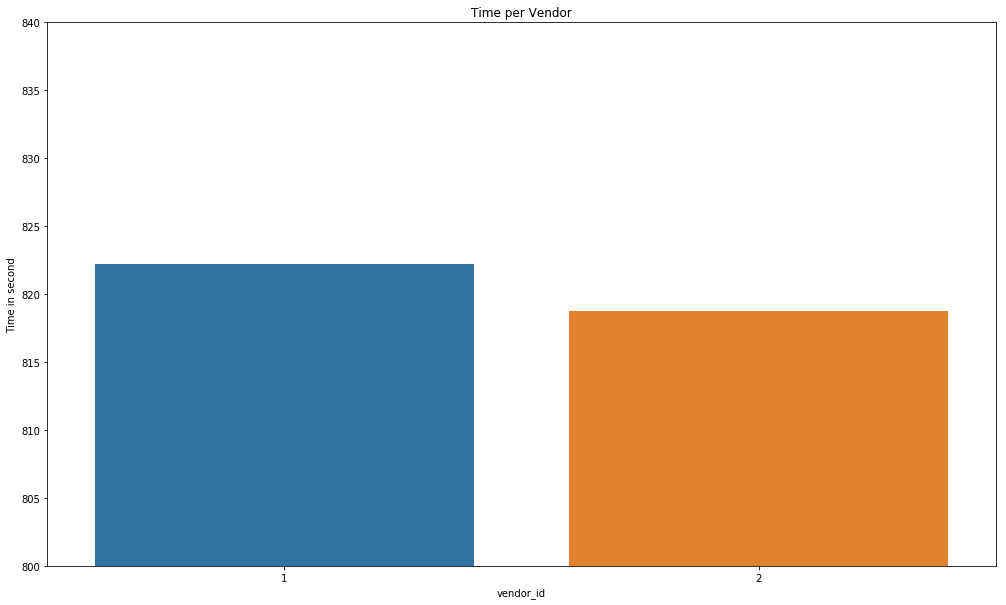

In [32]:
# let's see how two vendors differ in their mean trip duration
import warnings
warnings.filterwarnings("ignore")
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1, figsize = (17,10)) # little wider for better 
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(plot_vendor.index, plot_vendor.values)
plt.title('Time per Vendor')
# plt.legend(loc=0)
plt.ylabel('Time in second')

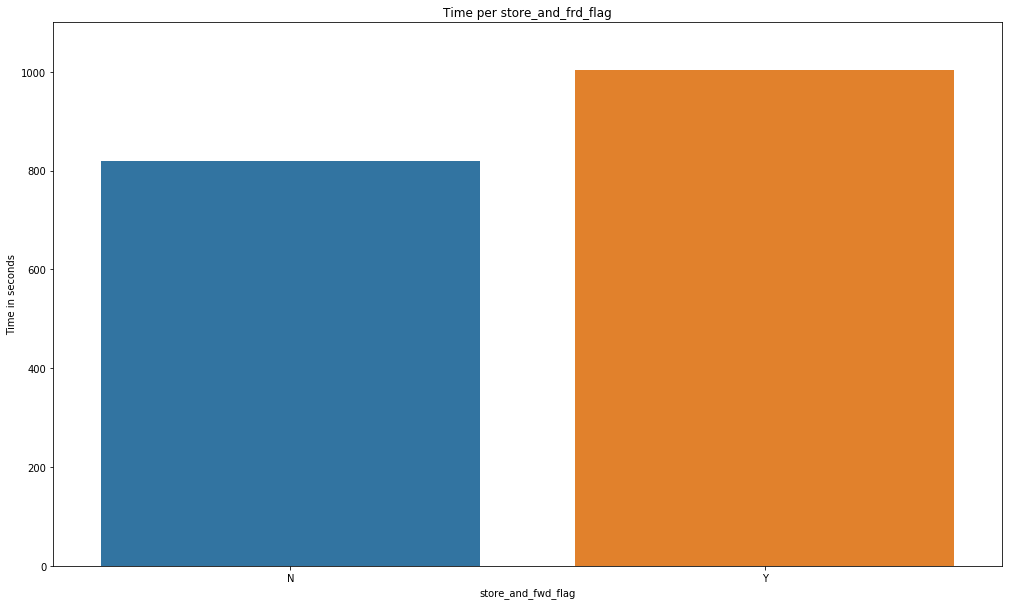

In [33]:
# now look at the 'store_and_frd_flag' variation with trip dur
flag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

# flag.index -----> unique values in 'store_and_frd_flag'
# flag.values ----> mean of the cooresponding values 
plt.subplots(1,1, figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_frd_flag')
# plt.legend(loc=0)
plt.ylabel('Time in seconds')
sns.barplot(flag.index, flag.values)

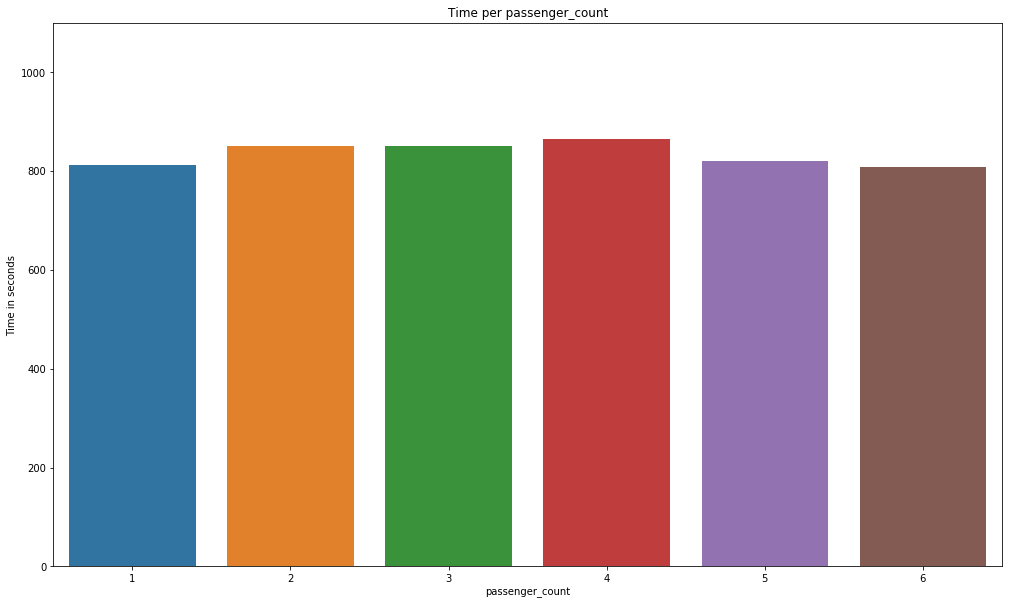

In [34]:
# grouping the mean travel time by the 'passenger count'
ps_count = train.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1, figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per passenger_count')
# plt.legend(loc=0)
plt.ylabel('Time in seconds')
sns.barplot(ps_count.index, ps_count.values)

In [35]:
# check both train and test for no of trips per passenger
print(train.groupby('passenger_count').size())
print("==============")
print(test.groupby('passenger_count').size())

passenger_count
1    34877
2     7107
3     1997
4      999
5     2651
6     1636
dtype: int64
passenger_count
1    7261
2    1312
3     401
4     182
5     498
6     346
dtype: int64


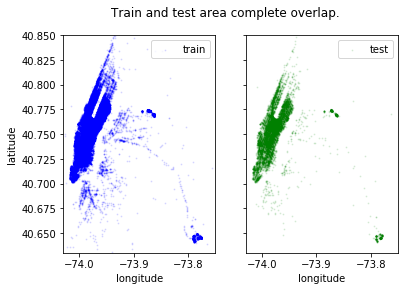

In [36]:
# visualize the pickup location
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train['pickup_longitude'].values, 
              train['pickup_latitude'].values,
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(test['pickup_longitude'].values, 
              test['pickup_latitude'].values,
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [37]:
# Need more details to understand it completely
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [38]:
# Create new feature
# great circle distance(distance_haversine)
train.loc[:,'distance_haversine'] = haversine_array(
    train['pickup_latitude'].values, train['pickup_longitude'].values,
    train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:,'distance_haversine'] = haversine_array(
    test['pickup_latitude'].values, test['pickup_longitude'].values,
    test['dropoff_latitude'].values, test['dropoff_longitude'].values)

# distance_dummy_manhattan
train.loc[:,'distance_dummy_manhattan'] = dummy_manhattan_distance(
    train['pickup_latitude'].values, train['pickup_longitude'].values,
    train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:,'distance_dummy_manhattan'] = dummy_manhattan_distance(
    test['pickup_latitude'].values, test['pickup_longitude'].values,
    test['dropoff_latitude'].values, test['dropoff_longitude'].values)

# direction
train.loc[:,'direction'] = bearing_array(
    train['pickup_latitude'].values, train['pickup_longitude'].values,
    train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:,'direction'] = bearing_array(
    test['pickup_latitude'].values, test['pickup_longitude'].values,
    test['dropoff_latitude'].values, test['dropoff_longitude'].values)


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 16 columns):
id                          49267 non-null object
vendor_id                   49267 non-null int64
pickup_datetime             49267 non-null datetime64[ns]
dropoff_datetime            49267 non-null datetime64[ns]
passenger_count             49267 non-null int64
pickup_longitude            49267 non-null float64
pickup_latitude             49267 non-null float64
dropoff_longitude           49267 non-null float64
dropoff_latitude            49267 non-null float64
store_and_fwd_flag          49267 non-null object
trip_duration               49267 non-null int64
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(3), object(3)
memory usag

In [40]:
# Make cluster for neighbourhoods
# To find some interseting facts about locations
from sklearn.cluster import MiniBatchKMeans

# Make stacks of coordinates(USE TWO BRACKETS)
# first create ['A', 'B'] as one array now use simple method to get values
coords_stack = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                         train[['dropoff_latitude', 'dropoff_longitude']].values))


In [41]:
coords_stack.shape # Why it work means 
# because we want to make clusters of the coordinates

(98534, 2)

In [42]:
# We take some sample randomly and then we apply our clusttering 
# only on those samples
sample_ind = np.random.permutation(len(coords_stack))[:10000]

# Use KMEANS algo
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=1000).fit(coords_stack[sample_ind])


In [43]:
kmeans

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=40,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [44]:
# find the relations between the pickup and dropoff coor and clusters
train.loc[:,'pickup_cluster'] = kmeans.predict(train[['pickup_latitude',
                                                     'pickup_longitude']])
train.loc[:,'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude',
                                                      'dropoff_longitude']])

test.loc[:,'pickup_cluster'] = kmeans.predict(test[['pickup_latitude',
                                                     'pickup_longitude']])
test.loc[:,'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude',
                                                     'dropoff_longitude']])


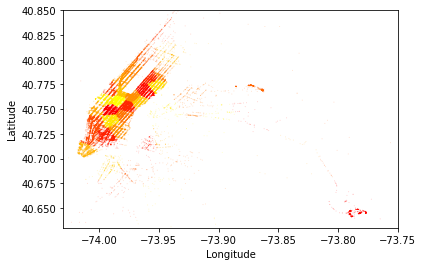

In [45]:
# map of pickup_location cluster map
# s-->size of the markers
# lw-->linewidth
# c --> colors sequence

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values, train.pickup_latitude.values,
          s=1, lw=0, c=train.pickup_cluster.values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [46]:
# Make new feature 'MONTH'
train['Month'] = train['pickup_datetime'].dt.month
test['Month'] = test['pickup_datetime'].dt.month

In [47]:
print(train.groupby('Month').size())
print("=========")
print(test.groupby('Month').size())

Month
1    7845
2    8077
3    8500
4    8599
5    8350
6    7896
dtype: int64
Month
6    10000
dtype: int64


In [48]:
# make new feature 'DAYOFMONTH'
train['Day_of_Month'] = train['pickup_datetime'].dt.day
test['Day_of_Month'] = test['pickup_datetime'].dt.day
print(len(train.groupby('Day_of_Month').size()))
print(len(test.groupby('Day_of_Month').size()))


31
4


In [49]:
# make new feature 'Hour'
train['Hour'] = train['pickup_datetime'].dt.hour
test['Hour'] = test['pickup_datetime'].dt.hour
print(len(train.groupby('Hour').size()))
print(len(test.groupby('Hour').size()))


24
24


In [50]:
# make new feature 'day_of_week'
train['day_of_week'] = train['pickup_datetime'].dt.dayofweek
test['day_of_week'] = test['pickup_datetime'].dt.dayofweek
print(len(train.groupby('day_of_week').size()))
print(len(test.groupby('day_of_week').size()))


7
4


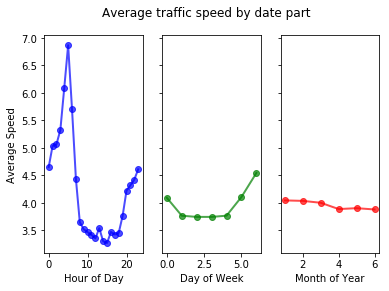

In [51]:
# Now we create an temporary feature 'avg_speed_h'
train.loc[:, 'avg_speed_h'] = 1000*train['distance_haversine']/train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000*train['distance_dummy_manhattan']/train['trip_duration']

fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('Hour')['avg_speed_h'].mean(), 'bo-',
          lw=2, alpha=0.7)
ax[1].plot(train.groupby('day_of_week')['avg_speed_h'].mean(), 'go-',
          lw=2, alpha=0.7)
ax[2].plot(train.groupby('Month')['avg_speed_h'].mean(), 'ro-',
          lw=2, alpha=0.7)

ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Speed')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')

fig.suptitle('Average traffic speed by date part')
plt.show()

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 24 columns):
id                          49267 non-null object
vendor_id                   49267 non-null int64
pickup_datetime             49267 non-null datetime64[ns]
dropoff_datetime            49267 non-null datetime64[ns]
passenger_count             49267 non-null int64
pickup_longitude            49267 non-null float64
pickup_latitude             49267 non-null float64
dropoff_longitude           49267 non-null float64
dropoff_latitude            49267 non-null float64
store_and_fwd_flag          49267 non-null object
trip_duration               49267 non-null int64
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster      

In [53]:
# plots between 'pickup_location' and 'average_speed'

# we make groups by rounding the coord
train.loc[:,'pickup_lat_bin'] = np.round(train['pickup_latitude'],3)
train.loc[:,'pickup_long_bin'] = np.round(train['pickup_longitude'],3)


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 26 columns):
id                          49267 non-null object
vendor_id                   49267 non-null int64
pickup_datetime             49267 non-null datetime64[ns]
dropoff_datetime            49267 non-null datetime64[ns]
passenger_count             49267 non-null int64
pickup_longitude            49267 non-null float64
pickup_latitude             49267 non-null float64
dropoff_longitude           49267 non-null float64
dropoff_latitude            49267 non-null float64
store_and_fwd_flag          49267 non-null object
trip_duration               49267 non-null int64
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster      

In [55]:
len(train['pickup_lat_bin'].unique())

213

In [56]:
# we know at centre there are more crowds and spped effects from it
gby_cols = ['pickup_lat_bin', 'pickup_long_bin']
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()

# on --> label or list (should be find in both the feature)
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)

#=============# check it what it will do
# it keep only those whose
coord_stats = coord_stats[coord_stats['id']>100]
#=============#

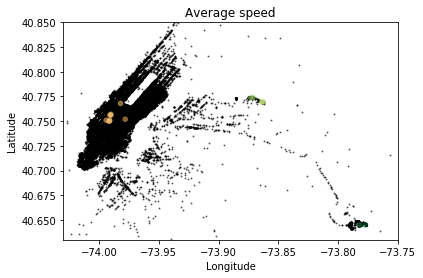

In [57]:
# copied directly
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values, c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

In [60]:
# Now we use "OSRM" feature which explore the fastest routes from 
# specific starting points in NEW-YORK
fr = pd.read_csv('small_data_set/fast_route1.csv', index_col=0)

In [62]:
fr.head(10)

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.100,164.900,5
1,id2377394,2513.200,332.000,6
2,id3504673,1779.400,235.800,4
3,id2181028,1614.900,140.100,5
4,id0801584,1393.500,189.400,5
5,id1813257,1705.100,138.800,5
6,id1301050,1310.700,160.600,2
7,id0012891,6786.800,601.800,13
8,id1436371,3935.000,535.400,6
9,id1299289,5596.600,514.800,9


In [63]:
coord_stats

,pickup_lat_bin,pickup_long_bin,avg_speed_h,id
44,40.645,-73.782,7.669,206
47,40.645,-73.777,8.167,154
2150,40.750,-73.992,3.150,190
2151,40.750,-73.991,3.237,288
2194,40.751,-73.994,3.189,321
2197,40.751,-73.991,3.599,125
2253,40.752,-73.978,3.179,124
2435,40.756,-73.991,3.186,131
2436,40.756,-73.990,3.242,117
2487,40.757,-73.990,3.763,151


In [64]:
fr.describe()

,total_distance,total_travel_time,number_of_steps
count,50000.000,50000.000,50000.000
mean,2521.896,268.076,5.599
std,1556.261,156.789,2.303
min,0.000,0.000,2.000
25%,1438.875,157.400,4.000
50%,2175.950,234.200,5.000
75%,3239.150,343.300,7.000
max,27403.700,1896.200,22.000


In [65]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
id                   50000 non-null object
total_distance       50000 non-null float64
total_travel_time    50000 non-null float64
number_of_steps      50000 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49999
Data columns (total 26 columns):
id                          49267 non-null object
vendor_id                   49267 non-null int64
pickup_datetime             49267 non-null datetime64[ns]
dropoff_datetime            49267 non-null datetime64[ns]
passenger_count             49267 non-null int64
pickup_longitude            49267 non-null float64
pickup_latitude             49267 non-null float64
dropoff_longitude           49267 non-null float64
dropoff_latitude            49267 non-null float64
store_and_fwd_flag          49267 non-null object
trip_duration               49267 non-null int64
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster      

In [82]:
# merging new data with the train and testing data

train1 = train.merge(fr, how='left', on='id')


In [84]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49266
Data columns (total 29 columns):
id                          49267 non-null object
vendor_id                   49267 non-null int64
pickup_datetime             49267 non-null datetime64[ns]
dropoff_datetime            49267 non-null datetime64[ns]
passenger_count             49267 non-null int64
pickup_longitude            49267 non-null float64
pickup_latitude             49267 non-null float64
dropoff_longitude           49267 non-null float64
dropoff_latitude            49267 non-null float64
store_and_fwd_flag          49267 non-null object
trip_duration               49267 non-null int64
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster      

In [69]:
print(train1.shape)
print(test.shape)

(49267, 29)
(10000, 19)


In [85]:
# creat dummy variable
# make sth like this --> vi_1 vi_2
vendor_train = pd.get_dummies(train1['vendor_id'], 
                              prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], 
                             prefix='vi', prefix_sep='_')

passenger_count_train = pd.get_dummies(train1['passenger_count'], 
                                      prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], 
                                      prefix='pc', prefix_sep='_')

store_and_fwd_flag_train = pd.get_dummies(train1['store_and_fwd_flag'],
                                         prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'],
                                         prefix='sf', prefix_sep='_')

cluster_pickup_train = pd.get_dummies(train1['pickup_cluster'],
                                     prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'],
                                     prefix='p', prefix_sep='_')

cluster_dropoff_train = pd.get_dummies(train1['dropoff_cluster'],
                                      prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'],
                                      prefix='d', prefix_sep='_')

month_train = pd.get_dummies(train1['Month'], 
                             prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['Month'], 
                            prefix='m', prefix_sep='_')

dom_train = pd.get_dummies(train1['Day_of_Month'], 
                           prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['Day_of_Month'], 
                          prefix='dom', prefix_sep='_')

hour_train = pd.get_dummies(train1['Hour'], 
                            prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['Hour'], 
                           prefix='h', prefix_sep='_')

dow_train = pd.get_dummies(train1['day_of_week'], 
                           prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['day_of_week'], 
                          prefix='dow', prefix_sep='_')

KeyError: 'vendor_id'

In [71]:
print(passenger_count_train.shape)
print(passenger_count_test.shape)

(49267, 6)
(10000, 6)


In [72]:
print(cluster_dropoff_train.shape)
print(cluster_dropoff_test.shape)

(49267, 40)
(10000, 40)


In [81]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49266
Data columns (total 11 columns):
pickup_datetime             49267 non-null datetime64[ns]
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster             49267 non-null int32
total_distance              36531 non-null float64
total_travel_time           36531 non-null float64
number_of_steps             36531 non-null float64
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 4.1+ MB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
id                          10000 non-null object
vendor_id                   10000 non-null int64
pickup_datetime             10000 non-null datetime64[ns]
passenger_count             10000 non-null int64
pickup_longitude            10000 non-null float64
pickup_latitude             10000 non-null float64
dropoff_longitude           10000 non-null float64
dropoff_latitude            10000 non-null float64
store_and_fwd_flag          10000 non-null object
pickup_date                 10000 non-null object
distance_haversine          10000 non-null float64
distance_dummy_manhattan    10000 non-null float64
direction                   10000 non-null float64
pickup_cluster              10000 non-null int32
dropoff_cluster             10000 non-null int32
Month                       10000 non-null int64
Day_of_Month                10000 non-null int64
Hour                        10000

In [80]:
# to drop any of the category if not match, then we can do
#passenger_count_test = passenger_count_test.drop('pc_9', axis=1)

train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49267 entries, 0 to 49266
Data columns (total 11 columns):
pickup_datetime             49267 non-null datetime64[ns]
pickup_date                 49267 non-null object
log_trip_duration           49267 non-null float64
distance_haversine          49267 non-null float64
distance_dummy_manhattan    49267 non-null float64
direction                   49267 non-null float64
pickup_cluster              49267 non-null int32
dropoff_cluster             49267 non-null int32
total_distance              36531 non-null float64
total_travel_time           36531 non-null float64
number_of_steps             36531 non-null float64
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 4.1+ MB


In [78]:
# drop the categorical data and add dummy variable(hot encoded vector)
train1 = train1.drop(['id','vendor_id','passenger_count',
                    'store_and_fwd_flag','Month','Day_of_Month','Hour',
                    'day_of_week','pickup_latitude','pickup_longitude',
                    'dropoff_longitude','dropoff_latitude'], axis=1)

Test_id = test['id']
test = test.drop(['id','vendor_id','passenger_count',
                    'store_and_fwd_flag','Month','Day_of_Month','Hour',
                    'day_of_week','pickup_latitude','pickup_longitude',
                    'dropoff_longitude','dropoff_latitude'], axis=1)

train1 = train1.drop(['dropoff_datetime','avg_speed_h','avg_speed_m',
                     'pickup_lat_bin','pickup_long_bin',
                      'trip_duration'], axis=1)

ValueError: labels ['id' 'vendor_id' 'passenger_count' 'store_and_fwd_flag' 'Month'
 'Day_of_Month' 'Hour' 'day_of_week' 'pickup_latitude' 'pickup_longitude'
 'dropoff_longitude' 'dropoff_latitude'] not contained in axis

In [78]:
train1.columns

Index(['Unnamed: 0_x', 'pickup_datetime', 'dropoff_datetime', 'trip_duration',
       'pickup_date', 'log_trip_duration', 'distance_haversine',
       'distance_dummy_manhattan', 'direction', 'pickup_cluster',
       'dropoff_cluster', 'avg_speed_h', 'avg_speed_m', 'pickup_lat_bin',
       'pickup_long_bin', 'Unnamed: 0_y', 'total_distance',
       'total_travel_time', 'number_of_steps'],
      dtype='object')

In [86]:
# Let's add indicator variables to our datasets
Train_Master = pd.concat([train1, vendor_train, 
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train, 
                          cluster_dropoff_train,
                          month_train, dom_train,
                          hour_test, dow_train], axis=1)

In [88]:
Train_Master.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,0.000,0.000,1.000,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,0.000,0.000,1.000,0,0,0,0,0,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,0.000,0.000,1.000,0,1,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,0.000,0.000,1.000,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,0.000,0.000,1.000,0,0,0,0,0,1,0


In [89]:
Test_Master = pd.concat([test, vendor_train, 
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train, 
                          cluster_dropoff_train,
                          month_train, dom_train,
                          hour_test, dow_train], axis=1)

In [90]:
Train_Master.shape, Test_Master.shape

((49267, 187), (49267, 165))

In [91]:
# Drop two more useless info
Train_Master = Train_Master.drop(['pickup_datetime',
                                  'pickup_date'], axis=1)
Test_Master = Test_Master.drop(['pickup_datetime',
                                'pickup_date'], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

In [95]:
# split Train data as 80-20 rule
Train, Test = train_test_split(Train_Master[1:100], test_size=0.2)

# Also drop logtransformed trip duration
X_train = Train.drop(['log_trip_duration'], axis=1)
Y_train = Train['log_trip_duration']
X_test = Test.drop(['log_trip_duration'], axis=1)
Y_test = Test['log_trip_duration']

In [96]:
# 9    7.112        92   7.759        81   6.256
# Reset their index(look how weird these look)
Y_train = Y_train.reset_index().drop('index', axis=1)
Y_test = Y_test.reset_index().drop('index', axis=1)

In [103]:

import xgboost as xgb
import sklear.linear_model.LinearRegression
import sklear.linear_model.Ridge
import sklear.linear_model.BayesianRidge
from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
'''
# create XGBoost Matrics(to train model)
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_Master)

watchlist = [(dtrain,'train'), (dvalid, 'valid')]
'''